![QuantConnect Logo](https://cdn.quantconnect.com/web/i/icon.png)
<hr>

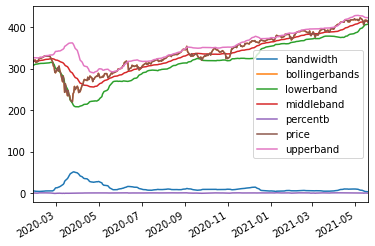

In [1]:
# QuantBook Analysis Tool 
# For more information see [https://www.quantconnect.com/docs/research/overview]
qb = QuantBook()
spy = qb.AddEquity("SPY")
history = qb.History(qb.Securities.Keys, 360, Resolution.Daily)

# Indicator Analysis
bbdf = qb.Indicator(BollingerBands(30, 2), spy.Symbol, 360, Resolution.Daily)
bbdf.drop('standarddeviation', 1).plot()

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

qb = QuantBook()
spy = qb.AddEquity("SPY").Symbol

#get SPY data from August 2010 to the present
start_date = datetime(2010, 8, 1, 0, 0, 0)
end_date = qb.Time
spy_table = qb.History(spy, start_date, end_date, Resolution.Daily)

spy_total = spy_table[['open','close']]
#calculate log returns
spy_log_return = np.log(spy_total.close).diff().dropna()
print('Population mean:', np.mean(spy_log_return))
print('Population standard deviation:',np.std(spy_log_return))

Population mean: 0.0005553855973553709
Population standard deviation: 0.01075381385301635


In [11]:
class BootCampTask(QCAlgorithm):

    def Initialize(self):
        self.SetStartDate(2018, 11, 4)
        self.SetEndDate(2021, 4, 4)

        #1,2. Select TSLA minute resolution data and set it to Raw normalization mode
        self.iwm = self.AddEquity("TSLA", Resolution.Minute)
        self.iwm.SetDataNormalizationMode(DataNormalizationMode.Raw)

    def OnData(self, data):

        #3. Place an order for 100 shares of TSLA and print the average fill price
        #4. Debug the AveragePrice of TSLA
        if not self.Portfolio.Invested:
            self.MarketOrder("TSLA", 100)
            self.Debug(str(self.Portfolio["TSLA"].AveragePrice))

In [13]:
print('10 days sample returns:', np.mean(spy_log_return.tail(10)))
print('10 days sample standard deviation:', np.std(spy_log_return.tail(10)))
print('1000 days sample returns:', np.mean(spy_log_return.tail(1000)))
print('1000 days sample standard deviation:', np.std(spy_log_return.tail(1000)))

10 days sample returns: -0.000889367358623705
10 days sample standard deviation: 0.010976127344019874
1000 days sample returns: 0.0006074500707556067
1000 days sample standard deviation: 0.012984045412002529


In [14]:
#apply the formula above to calculate confidence interval
bottom_1 = np.mean(spy_log_return.tail(10))-1.96*np.std(spy_log_return.tail(10))/(np.sqrt(len((spy_log_return.tail(10)))))
upper_1 = np.mean(spy_log_return.tail(10))+1.96*np.std(spy_log_return.tail(10))/(np.sqrt(len((spy_log_return.tail(10)))))
bottom_2 = np.mean(spy_log_return.tail(1000))-1.96*np.std(spy_log_return.tail(1000))/(np.sqrt(len((spy_log_return.tail(1000)))))
upper_2 = np.mean(spy_log_return.tail(1000))+1.96*np.std(spy_log_return.tail(1000))/(np.sqrt(len((spy_log_return.tail(1000)))))
#print the outcomes
print('10 days 95% confidence inverval:', (bottom_1,upper_1))
print('1000 days 95% confidence inverval:', (bottom_2,upper_2))

10 days 95% confidence inverval: (-0.007692441568474541, 0.005913706851227132)
1000 days 95% confidence inverval: (-0.0001973094014461451, 0.0014122095429573585)


In [15]:
mean_1000 = np.mean(spy_log_return.tail(1000))
std_1000 = np.std(spy_log_return.tail(1000))
mean_10 = np.mean(spy_log_return.tail(10))
std_10 = np.std(spy_log_return.tail(10))
s = pd.Series([mean_10,std_10,mean_1000,std_1000],index = ['mean_10', 'std_10','mean_1000','std_1000'])
print(s)


mean_10     -0.000889
std_10       0.010976
mean_1000    0.000607
std_1000     0.012984
dtype: float64


In [16]:
bottom = 0 - 1.64*std_1000/np.sqrt(1000)
upper = 0 + 1.64*std_1000/np.sqrt(1000)
print((bottom, upper))

(-0.0006733701706177923, 0.0006733701706177923)


In [17]:
bottom = 0 - 1.96*std_1000/np.sqrt(1000)
upper = 0 + 1.96*std_1000/np.sqrt(1000)
print((bottom, upper))

(-0.0008047594722017518, 0.0008047594722017518)


In [18]:
print(np.sqrt(1000)*(mean_1000 - 0)/std_1000)

1.4794509164627854


In [19]:
import scipy.stats as st
print((1 - st.norm.cdf(1.9488)))

0.02565965688799665


In [21]:
mean_1200 = np.mean(spy_log_return.tail(1200))
std_1200 = np.std(spy_log_return.tail(1200))
z_score = np.sqrt(1200)*(mean_1200 - 0)/std_1200
print('z-score = ',z_score)
p_value = (1 - st.norm.cdf(z_score))
print('p_value = ',p_value)

z-score =  1.7435727326348671
p_value =  0.0406168107183571
